# Data Evaluation

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
#Set path variable such that it points to the folder 'models'
path = 'C:/Users/saend/Desktop/MasterThesis/Thesis/models/'

models = ['Boosting', 'GP', 'GPB', 'randomForrest']

In [4]:
#Prepare for data load
dict_data = {}
for i in models:
    path_loop = path + i
    os.chdir(path_loop)
    list_data = os.listdir()
    for x in list_data:
        path_loop_two = path_loop + '/' + x
        os.chdir(path_loop_two)
        key = x + '_' + i
        df = pd.read_csv('outputs.csv')
        dict_data[key] = df
        

In [5]:
keys = dict_data.keys()

In [6]:
#List with datasets for regression
regression_data = ['StudentMarks_GP', 'StudentMarks_GPB', 'StudentMarks_randomForrest', 'StudentMarks_Boosting',
                  'possum_GP', 'possum_GPB', 'possum_randomForrest', 'possum_Boosting',
                  'CarPrice_GP', 'CarPrice_GPB', 'CarPrice_randomForrest', 'CarPrice_Boosting',
                  'Housing_GP', 'Housing_GPB', 'Housing_randomForrest', 'Housing_Boosting',
                  'Energy_GP', 'Energy_GPB', 'Energy_randomForrest', 'Energy_Boosting',
                  'insurance_GP', 'insurance_GPB','insurance_randomForrest', 'insurance_Boosting',
                  'Abalone_GP', 'Abalone_GPB', 'Abalone_randomForrest', 'Abalone_Boosting',
                  'WineWhite_GP', 'WineWhite_GPB', 'WineWhite_randomForrest', 'WineWhite_Boosting',
                   'diamonds_GP', 'diamonds_GPB', 'diamonds_randomForrest', 'diamonds_Boosting',
                  'kcHouse_GP', 'kcHouse_GPB', 'kcHouse_randomForrest', 'kcHouse_Boosting']

#list with datasets for classification
classification_data = ['Sonar_GP', 'Sonar_GPB', 'Sonar_randomForrest', 'Sonar_Boosting',
                      'Cancer_GP', 'Cancer_GPB', 'Cancer_randomForrest', 'Cancer_Boosting',
                      'Titanic_GP', 'Titanic_GPB', 'Titanic_randomForrest', 'Titanic_Boosting',
                      'UCL_GP', 'UCL_GPB', 'UCL_randomForrest', 'UCL_Boosting',
                      'Diabetes_GP', 'Diabetes_GPB', 'Diabetes_randomForrest', 'Diabetes_Boosting',
                      'Banknote_GP', 'Banknote_GPB', 'Banknote_randomForrest', 'Banknote_Boosting',
                      'Pumpkin_GP', 'Pumpkin_GPB', 'Pumpkin_randomForrest', 'Pumpkin_Boosting',
                      'WaterQuality_GP', 'WaterQuality_GPB', 'WaterQuality_randomForrest', 'WaterQuality_Boosting',
                      'Churn_GP', 'Churn_GPB', 'Churn_randomForrest', 'Churn_Boosting',
                      'Smoking_GP', 'Smoking_GPB', 'Smoking_randomForrest', 'Smoking_Boosting']

In [7]:
dict_cla = {}
dict_reg = {}

for i in regression_data:
    dict_reg[i] = dict_data[i]

for i in classification_data:
    dict_cla[i] = dict_data[i]

## Regression

### Evaluation CRPS

In [8]:
import re

df = pd.DataFrame(columns=['Dataset', 'Gaussian Process', 'Gaussian Process Boosting', 'Random Forest'])

dataset_list = []
gp = []
gpb = []
rf = []
bst = []

dataset = 'Start'
for i in regression_data:
    df_loop = dict_data[i]
    dataset_new, method = re.split("\_", i)
    if dataset == dataset_new:
        next
    else:
        dataset = dataset_new
        dataset_list.append(dataset_new)
        
    if method == 'GP':
        crps = df_loop['CRPS'].mean()
        gp.append(crps)
    elif method == 'GPB':
        crps = df_loop['CRPS'].mean()
        gpb.append(crps)
    elif method == 'randomForrest':
        crps = df_loop['CRPS'].mean()
        rf.append(crps)
    elif method == 'Boosting':
        crps = df_loop['CRPS'].mean()
        bst.append(crps)
    
df['Dataset'] = dataset_list
df['Gaussian Process'] = gp
df['Gaussian Process Boosting'] = gpb
df['Random Forest'] = rf
df['Boosting'] = bst


print('CRPS: ')
df = df.round(5)
df

CRPS: 


,Dataset,Gaussian Process,Gaussian Process Boosting,Random Forest,Boosting
0,StudentMarks,4.00933,4.18491,3.98074,4.05398
1,possum,0.29158,0.36131,0.35985,0.28779
2,CarPrice,1940.17643,1997.61800,1710.08309,2004.74770
3,Housing,1.95024,1.93264,1.62970,1.63224
4,Energy,3.42399,3.58281,3.37940,3.48413
5,insurance,2487.39500,2694.61283,3075.76094,2699.79482
6,Abalone,0.60782,0.53350,0.56234,0.49806
7,WineWhite,0.13869,0.12880,0.13772,0.11570
8,diamonds,1023.63504,1036.34208,1043.08926,1053.90028
9,kcHouse,60854.00880,61126.72820,63488.36019,62176.40119


In [9]:
#lists with ranks
gp_ranks = [2,2,2,4,2,1,4,4,1,1]
gpb_ranks = [3,4,3,3,4,2,2,2,2,2]
rf_ranks = [1,3,1,1,1,4,3,3,3,4]
bst_ranks = [4,1,4,2,3,3,1,1,3,3]

from scipy import stats

#H0: The mean for each population is equal
#HA: At least one population mean is different from the rest

#Calculate Friedman Statistic
stats.friedmanchisquare(gp_ranks, gpb_ranks, rf_ranks, bst_ranks)

#p-value: pvalue=0.9155503014130028 > 0.05 => We can not reject the H0




FriedmanchisquareResult(statistic=0.5151515151515059, pvalue=0.9155503014130028)

### Evaluation RMSE

In [34]:
import re

df = pd.DataFrame(columns=['Dataset', 'Gaussian Process', 'Gaussian Process Boosting', 'Random Forest'])

dataset_list = []
gp = []
gpb = []
rf = []
bst = []

dataset = 'Start'
for i in regression_data:
    df_loop = dict_data[i]
    dataset_new, method = re.split("\_", i)
    if dataset == dataset_new:
        next
    else:
        dataset = dataset_new
        dataset_list.append(dataset_new)
        
    if method == 'GP':
        crps = df_loop['RMSE'].mean()
        gp.append(crps)
    elif method == 'GPB':
        crps = df_loop['RMSE'].mean()
        gpb.append(crps)
    elif method == 'randomForrest':
        crps = df_loop['RMSE'].mean()
        rf.append(crps)
    elif method == 'Boosting':
        crps = df_loop['RMSE'].mean()
        bst.append(crps)
    
df['Dataset'] = dataset_list
df['Gaussian Process'] = gp
df['Gaussian Process Boosting'] = gpb
df['Random Forest'] = rf
df['Boosting'] = bst


print('RMSE: ')
df = df.round(5)
df


RMSE: 


,Dataset,Gaussian Process,Gaussian Process Boosting,Random Forest,Boosting
0,StudentMarks,2.27526,3.45218,1.97490,1.24372
1,possum,1.74594,1.93543,1.77443,1.73596
2,CarPrice,3425.15238,3078.37183,2150.41850,2508.23680
3,Housing,2.71306,2.72711,2.52125,2.71202
4,Energy,1.69856,2.44601,0.61738,0.55812
5,insurance,4823.08725,4802.79141,4631.66778,4683.34568
6,Abalone,2.25537,2.31799,2.44735,2.21770
7,WineWhite,0.69669,0.68513,0.68394,0.74842
8,diamonds,1270.27086,1646.03542,1242.93844,1251.31694
9,kcHouse,181114.76023,210998.94676,178965.12421,190531.03858


In [15]:
#Lists with ranks for RMSE
gp_ranks = [3,2,4,3,3,4,2,3,3,2]
gpb_ranks = [4,4,3,4,4,3,3,2,4,4]
rf_ranks = [2,3,1,1,2,1,4,1,1,1]
bst_ranks = [1,1,2,2,1,2,1,4,2,3]

#H0: The mean for each population is equal
#HA: At least one population mean is different from the rest

#Calculate Friedman statistic
print(stats.friedmanchisquare(gp_ranks, gpb_ranks, rf_ranks, bst_ranks))

#p-value: 0.004723911077134212 < 0.05 => We can reject the H0

#To proceed I have do conduct the Nemenyi test

print('Table with critical Values:')

d=['qo.o5',1.960, 2.343, 2.569, 2.728, 2.850, 2.949, 3.031, 3.102, 3.164]
d_1 = ['q0.10',1.645, 2.052, 2.291, 2.459, 2.589, 2.693, 2.780, 2.855, 2.920]
df_data = pd.DataFrame(columns=['Classifier', 2,3,4,5,6,7,8,9,10], data=[d,d_1])

print(df_data)

# Since we have 3 Classifier and want to check the significance at a 0.05 level the critical value is 2.343 this leads
# to the follwoing calculations

CD  = 2.569*np.sqrt(((4*9)/ 60))

print('CD: ', CD)

#The avarage rank of Random Forest is 1.2 and 2.2 by Gaussian Processes, which is second best.

significance = 1.7 + CD

print(significance, '<', 3.5, 'due to that we can not say, that Random Forest outperformed GPBoost')



FriedmanchisquareResult(statistic=12.960000000000008, pvalue=0.004723911077134212)
Table with critical Values:
  Classifier      2      3      4      5      6      7      8      9     10
0      qo.o5  1.960  2.343  2.569  2.728  2.850  2.949  3.031  3.102  3.164
1      q0.10  1.645  2.052  2.291  2.459  2.589  2.693  2.780  2.855  2.920
CD:  1.9899388432813707
3.6899388432813707 < 3.5 due to that we can not say, that Random Forest outperformed GPBoost


## Classification

### Evaluation ERR

In [35]:
import re

df = pd.DataFrame(columns=['Dataset', 'Gaussian Process', 'Gaussian Process Boosting', 'Random Forest'])

dataset_list = []
gp = []
gpb = []
rf = []
bst = []

dataset = 'Start'
for i in classification_data:
    df_loop = dict_data[i]
    dataset_new, method = re.split("\_", i)
    if dataset == dataset_new:
        next
    else:
        dataset = dataset_new
        dataset_list.append(dataset_new)
        
    if method == 'GP':
        crps = df_loop['ERR'].mean()
        gp.append(crps)
    elif method == 'GPB':
        crps = df_loop['ERR'].mean()
        gpb.append(crps)
    elif method == 'randomForrest':
        crps = df_loop['ERR'].mean()
        rf.append(crps)
    elif method == 'Boosting':
        crps = df_loop['ERR'].mean()
        bst.append(crps)
    
df['Dataset'] = dataset_list
df['Gaussian Process'] = gp
df['Gaussian Process Boosting'] = gpb
df['Random Forest'] = rf
df['Boosting'] = bst


print('ERR: ')
df  =df.round(5)
df


ERR: 


,Dataset,Gaussian Process,Gaussian Process Boosting,Random Forest,Boosting
0,Sonar,0.15580,0.16667,0.18841,0.15580
1,Cancer,0.04545,0.03485,0.03030,0.05000
2,Titanic,0.22879,0.21667,0.16515,0.20909
3,UCL,0.04091,0.03485,0.02576,0.03636
4,Diabetes,0.19394,0.19091,0.16364,0.18485
5,Banknote,0.00455,0.02879,0.02576,0.02879
6,Pumpkin,0.12424,0.13182,0.10606,0.15758
7,WaterQuality,0.11515,0.06061,0.08030,0.07879
8,Churn,0.16515,0.15758,0.13961,0.16667
9,Smoking,0.29394,0.29848,0.28333,0.31667


In [18]:
gp_ranks = [1.5,3,4,4,4,1,2,4,3,2]
gpb_ranks = [3,2,3,2,3,3.5,3,1,2,3]
rf_ranks = [4,1,1,1,1,2,1,3,1,1]
bst_ranks = [1.5,4,2,3,2,3.5,4,2,4,4]

print(sum(gp_ranks)/10)
print(sum(gpb_ranks)/10)
print(sum(rf_ranks)/10)
print(sum(bst_ranks)/10)

#H0: The mean for each population is equal
#HA: At least one population mean is different from the rest

print(stats.friedmanchisquare(gp_ranks, gpb_ranks, rf_ranks, bst_ranks))

#p-value: pvalue=0.06419632972109945... > 0.05 => We can not reject the H0



2.85
2.55
1.6
3.0
FriedmanchisquareResult(statistic=7.255102040816311, pvalue=0.06419632972109945)


### Evaluation Logloss

In [36]:
import re

df = pd.DataFrame(columns=['Dataset', 'Gaussian Process', 'Gaussian Process Boosting', 'Random Forest'])

dataset_list = []
gp = []
gpb = []
rf = []
bst = []

dataset = 'Start'
for i in classification_data:
    df_loop = dict_data[i]
    dataset_new, method = re.split("\_", i)
    if dataset == dataset_new:
        next
    else:
        dataset = dataset_new
        dataset_list.append(dataset_new)
        
    if method == 'GP':
        crps = df_loop['Logloss'].mean()
        gp.append(crps)
    elif method == 'GPB':
        crps = df_loop['Logloss'].mean()
        gpb.append(crps)
    elif method == 'randomForrest':
        crps = df_loop['Logloss'].mean()
        rf.append(crps)
    elif method == 'Boosting':
        crps = df_loop['Logloss'].mean()
        bst.append(crps)
    
df['Dataset'] = dataset_list
df['Gaussian Process'] = gp
df['Gaussian Process Boosting'] = gpb
df['Random Forest'] = rf
df['Boosting'] = bst


print('Logloss: ')
df = df.round(5)

df


Logloss: 


,Dataset,Gaussian Process,Gaussian Process Boosting,Random Forest,Boosting
0,Sonar,0.45085,0.44529,0.45064,0.39081
1,Cancer,0.14853,0.11096,0.13662,0.18808
2,Titanic,0.49814,0.46576,0.44588,0.47948
3,UCL,0.12616,0.11126,0.31317,0.14427
4,Diabetes,0.42446,0.42698,0.37401,0.47835
5,Banknote,0.15974,0.07079,0.07445,0.16082
6,Pumpkin,0.31427,0.33426,0.38105,0.38429
7,WaterQuality,0.29411,0.19961,0.36662,0.22037
8,Churn,0.40988,0.36300,0.35047,0.59343
9,Smoking,0.53632,0.55843,0.60946,0.55347


In [22]:
gp_ranks = [4,3,4,2,2,3,1,3,3,1]
gpb_ranks = [2,1,2,1,3,1,2,1,2,3]
rf_ranks = [3,2,1,4,1,2,3,4,1,4]
bst_ranks = [1,4,3,3,4,4,4,2,4,2]

print(np.mean(gp_ranks))
print(np.mean(gpb_ranks))
print(np.mean(rf_ranks))
print(np.mean(bst_ranks))

#H0: The mean for each population is equal
#HA: At least one population mean is different from the rest

print(stats.friedmanchisquare(gp_ranks, gpb_ranks, rf_ranks, bst_ranks))

#p-value:pvalue=0.27253179303401137 < 0.05 => We can reject the H0


2.6
1.8
2.5
3.1
FriedmanchisquareResult(statistic=5.159999999999997, pvalue=0.1604491360353501)


### Evaluation AUC

In [37]:
import re

df = pd.DataFrame(columns=['Dataset', 'Gaussian Process', 'Gaussian Process Boosting', 'Random Forest'])

dataset_list = []
gp = []
gpb = []
rf = []
bst = []

dataset = 'Start'
for i in classification_data:
    df_loop = dict_data[i]
    dataset_new, method = re.split("\_", i)
    if dataset == dataset_new:
        next
    else:
        dataset = dataset_new
        dataset_list.append(dataset_new)
        
    if method == 'GP':
        crps = df_loop['AUC'].mean()
        gp.append(crps)
    elif method == 'GPB':
        crps = df_loop['AUC'].mean()
        gpb.append(crps)
    elif method == 'randomForrest':
        crps = df_loop['AUC'].mean()
        rf.append(crps)
    elif method == 'Boosting':
        crps = df_loop['AUC'].mean()
        bst.append(crps)
    
df['Dataset'] = dataset_list
df['Gaussian Process'] = gp
df['Gaussian Process Boosting'] = gpb
df['Random Forest'] = rf
df['Boosting'] = bst


print('AUC: ')
df = df.round(5)

df


AUC: 


,Dataset,Gaussian Process,Gaussian Process Boosting,Random Forest,Boosting
0,Sonar,0.93181,0.91339,0.90215,0.90662
1,Cancer,0.99252,0.99356,0.99337,0.98519
2,Titanic,0.83224,0.84768,0.89685,0.86182
3,UCL,0.96537,0.90395,0.89535,0.91983
4,Diabetes,0.89212,0.88533,0.90973,0.87467
5,Banknote,1.00000,0.99906,0.99767,0.99429
6,Pumpkin,0.94294,0.93001,0.94693,0.92890
7,WaterQuality,0.86680,0.89716,0.85720,0.88471
8,Churn,0.80418,0.86301,0.85507,0.80227
9,Smoking,0.78316,0.77186,0.79488,0.76805


In [25]:
gp_ranks = [1,3,4,1,2,1,2,3,3,2]
gpb_ranks = [2,1,3,3,3,2,3,1,1,3]
rf_ranks = [4,2,1,4,1,3,1,4,2,1]
bst_ranks = [3,4,2,2,4,4,4,2,4,4]

print(np.mean(gp_ranks))
print(np.mean(gpb_ranks))
print(np.mean(rf_ranks))
print(np.mean(bst_ranks))

#H0: The mean for each population is equal
#HA: At least one population mean is different from the rest

print(stats.friedmanchisquare(gp_ranks, gpb_ranks, rf_ranks, bst_ranks))

#p-value: 0.1604491360353501 > 0.05 => We can not reject the H0


2.2
2.2
2.3
3.3
FriedmanchisquareResult(statistic=5.159999999999997, pvalue=0.1604491360353501)


## Create Plots for Discussion

In [27]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')




RMSE = [ 2.9,3.5,1.7,1.9]
CRPS = [ 2.2,1.7,2.4,2.5]

df_reg = pd.DataFrame(columns=['GP', 'GPB', 'RF', 'BST'], data=[RMSE,CRPS], index = ['RMSE','CRPS'])



ERR = [2.85,2.6,1.6,3]
Logloss = [2.6,1.8,2.5,3.1]
AUC  = [2.2,2.2,2.3,3.3]
df_cla = pd.DataFrame(columns=['GP', 'GPB', 'RF', 'BST'], data = [ERR,Logloss,AUC], index = ['ERR', 'Logloss', 'AUC'])


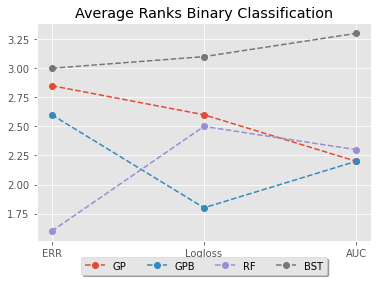

In [31]:
plt.plot(df_cla['GP'], '--o')
plt.plot(df_cla['GPB'], '--o')
plt.plot(df_cla['RF'], '--o')
plt.plot(df_cla['BST'], '--o')
plt.title('Average Ranks Binary Classification')

plt.legend(df_cla.columns,loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig('C:/Users/saend/Desktop/MasterThesis/Thesis/images/results/av_ranks_cla.jpg')

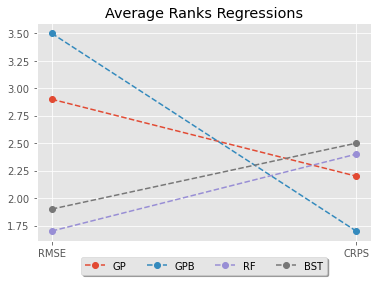

In [32]:
plt.plot(df_reg['GP'], '--o')
plt.plot(df_reg['GPB'], '--o')
plt.plot(df_reg['RF'], '--o')
plt.plot(df_reg['BST'], '--o')
plt.title('Average Ranks Regressions')

plt.legend(df_reg.columns,loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig('C:/Users/saend/Desktop/MasterThesis/Thesis/images/results/av_ranks_reg.jpg')